In [61]:
%matplotlib inline
import  matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.cross_validation import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Convolution1D
from keras.callbacks import EarlyStopping
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping

In [62]:
data = load_breast_cancer()
print(data.DESCR)

Breast Cancer Wisconsin (Diagnostic) Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)
        
        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.
 

In [63]:
print( data.data.shape, data.target.shape)

(569, 30) (569,)


In [64]:
trainx,testx,trainy,testy = train_test_split( data.data, data.target, test_size=0.2, random_state=123 )

In [65]:
print(trainx.shape, trainy.shape, to_categorical(trainy).shape)

(455, 30) (455,) (455, 2)


In [66]:
inputdim = data.data.shape[1]
output = to_categorical( data.target ).shape[1]

In [67]:
model = Sequential()
earystop = EarlyStopping( patience=2 )

In [68]:
model.add( Dense( input_dim=inputdim, output_dim=30 ) )
model.add( Dropout( 0.2 ) )
model.add( Activation( "sigmoid" ) )
model.add( Dense( 15 ) )
model.add( Activation( "sigmoid" ) )
model.add( Dense( 2 ) )
model.add( Activation( "sigmoid" ) )


In [69]:
model.compile( loss="categorical_crossentropy", optimizer="adam",metrics=['accuracy'] )

In [70]:
hist = model.fit( trainx, to_categorical(trainy), 
                 batch_size=50,
                 nb_epoch=50,
                 validation_split=0.1,
                 callbacks = [ earystop ]
                 )

Train on 409 samples, validate on 46 samples
Epoch 1/50
409/409 [==============================] - 0s - loss: 1.0365 - acc: 0.3716 - val_loss: 0.9535 - val_acc: 0.4130
Epoch 2/50
409/409 [==============================] - 0s - loss: 0.9667 - acc: 0.3716 - val_loss: 0.8971 - val_acc: 0.4130
Epoch 3/50
409/409 [==============================] - 0s - loss: 0.9043 - acc: 0.3716 - val_loss: 0.8405 - val_acc: 0.4130
Epoch 4/50
409/409 [==============================] - 0s - loss: 0.8516 - acc: 0.3716 - val_loss: 0.8017 - val_acc: 0.4130
Epoch 5/50
409/409 [==============================] - 0s - loss: 0.8053 - acc: 0.3716 - val_loss: 0.7709 - val_acc: 0.4130
Epoch 6/50
409/409 [==============================] - 0s - loss: 0.7709 - acc: 0.3716 - val_loss: 0.7449 - val_acc: 0.4130
Epoch 7/50
409/409 [==============================] - 0s - loss: 0.7421 - acc: 0.3716 - val_loss: 0.7228 - val_acc: 0.4130
Epoch 8/50
409/409 [==============================] - 0s - loss: 0.7177 - acc: 0.3692 - val_lo

In [71]:
hist.params

{'batch_size': 50,
 'do_validation': True,
 'metrics': ['loss', 'acc', 'val_loss', 'val_acc'],
 'nb_epoch': 50,
 'nb_sample': 409,
 'verbose': 1}

In [72]:
acc = hist.history[ "acc" ]
loss = hist.history[ 'loss' ]

In [73]:
epoch = range( len(acc) )

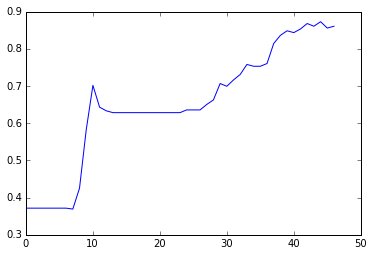

In [78]:
plt.plot( epoch, acc, label='acc' )

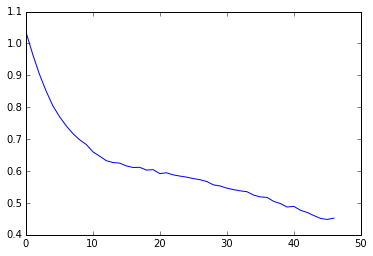

In [79]:
plt.plot( epoch, loss, label='loss' )

In [80]:
predy = model.predict_classes( testx )

 32/114 [=======>......................] - ETA: 0s

In [81]:
predy

array([1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0])

In [82]:
from sklearn.metrics import classification_report, confusion_matrix

In [83]:
confusion_matrix(predy, testy)

array([[31,  2],
       [10, 71]])

In [84]:
print(classification_report(predy, testy))

             precision    recall  f1-score   support

          0       0.76      0.94      0.84        33
          1       0.97      0.88      0.92        81

avg / total       0.91      0.89      0.90       114

